In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample_Submission.csv to Sample_Submission.csv


In [ ]:
dfans = pd.read_csv("Sample_Submission.csv")

In [ ]:
len(dfans)

355

In [ ]:
dfans #DD/MM/YYYY

,Date,Close
0,2/01/2019,100
1,3/01/2019,100
2,4/01/2019,100
3,7/01/2019,100
4,8/01/2019,100
...,...,...
350,22/05/2020,100
351,26/05/2020,100
352,27/05/2020,100
353,28/05/2020,100


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Stock Price Data.csv to Stock Price Data.csv


Exploratory data analysis 

In [ ]:
df = pd.read_csv("Stock Price Data.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
1,4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2,5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
3,6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
4,7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2260,24/12/2018,129.426000,132.755997,128.544003,129.597002,129.597002,4249370.4
2261,26/12/2018,130.667997,138.209994,130.308002,138.155997,138.155997,7299830.4
2262,27/12/2018,136.320003,142.079997,135.455997,142.079997,142.079997,7170950.4
2263,28/12/2018,142.800000,143.592004,139.749000,141.611993,141.611993,6548600.4
2264,31/12/2018,142.800000,144.573001,141.441005,143.673001,143.673001,4920950.4


In [ ]:
df2 = df.copy(deep = True)
df2["Date"] = pd.to_datetime(df2["Date"], infer_datetime_format=True)

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
1,2010-01-04,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2,2010-01-05,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
3,2010-01-06,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
4,2010-01-07,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [ ]:
df2.set_index(df2["Date"], inplace=True)

Text(0.5, 0, 'Date')

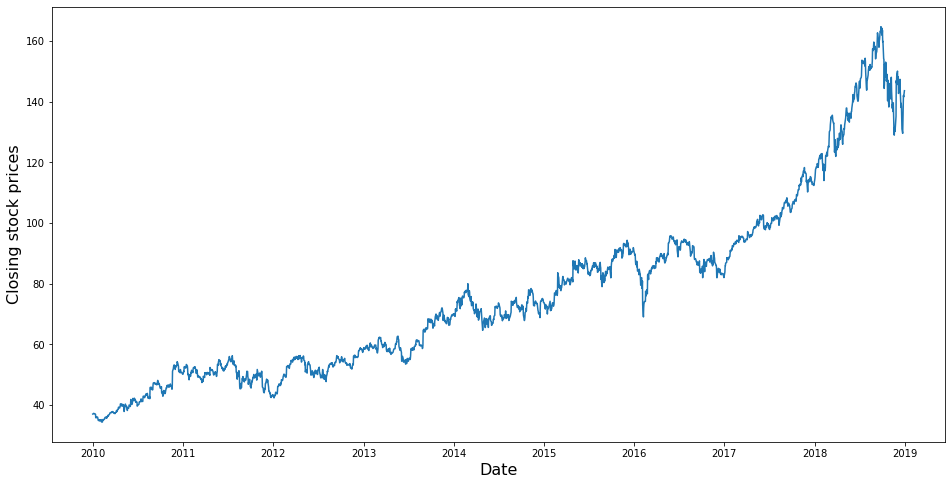

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df2["Close"])
plt.ylabel('Closing stock prices', fontsize=16)
plt.xlabel('Date', fontsize=16)

From visual observation data is not stationary since closing price shows an upward trend (not constant mean), and shows a non constant standard deviation

In [ ]:
#testing for stationarity
from statsmodels.tsa.stattools import adfuller
X = df2["Close"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.279036
p-value: 0.976362
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Since 0.279036 > -3.433, we do not reject null hypothesis and conclude time series is indeed non-stationary

Understanding volatility of next 7 days 

In [ ]:
pip install arch

     |████████████████████████████████| 798kB 6.1MB/s 


In [ ]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df_garch = df2.copy(deep = True)

In [ ]:
df_garch.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2009-12-31,2009-12-31,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
2010-01-04,2010-01-04,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2010-01-05,2010-01-05,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
2010-01-06,2010-01-06,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
2010-01-07,2010-01-07,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [ ]:
returns = (df_garch["Close"].pct_change().dropna())*100

Text(0.5, 0, 'Date')

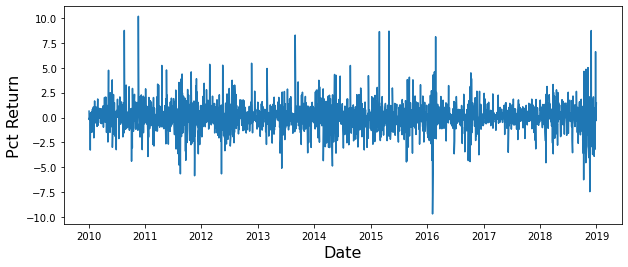

In [ ]:
#plotting percentage change in returns 
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.xlabel('Date', fontsize=16)

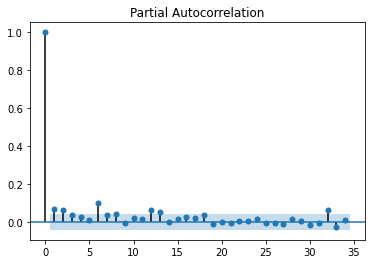

In [ ]:
#PACF
plot_pacf(returns**2)
plt.show()

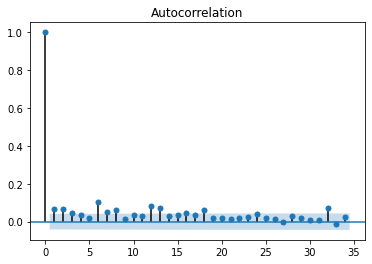

In [ ]:
#ACF
plot_acf(returns**2)
plt.show()

In [ ]:
model = arch_model(returns, p=1, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4002.841977390306
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4002.2388558044886
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4002.0963794097993
Iteration:      4,   Func. Count:     33,   Neg. LLF: 4001.224108445105
Iteration:      5,   Func. Count:     40,   Neg. LLF: 4000.9381849580777
Iteration:      6,   Func. Count:     47,   Neg. LLF: 4000.8468638426993
Iteration:      7,   Func. Count:     53,   Neg. LLF: 4000.770758398769
Iteration:      8,   Func. Count:     59,   Neg. LLF: 4000.753593122558
Iteration:      9,   Func. Count:     65,   Neg. LLF: 4000.7533027790464
Iteration:     10,   Func. Count:     71,   Neg. LLF: 4000.7533006838557
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4000.7533006834387
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -4000.75
Distribution:                  Normal   AIC:                           8009.51
Method:            Maximum Likelihood   BIC:                           8032.41
                                        No. Observations:                 2264
Date:                Mon, Oct 05 2020   Df Residuals:                     2260
Time:                        13:57:10   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1106  2.894e-02      3.823  1.318e-04 [5.392e-02,  0.167]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1853      0.155      1.197      0.231    [ -0.118,  0.489]
alpha[1]       0.1106  7.983e-02      1.386      0.166 [-4.583e-02,  0.267]
beta[1]        0.8118      0.133      6.112  9.856e-10    [  0.551,  1.072]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model2 = arch_model(returns, p=1, q=0)
model_fit = model2.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4193.627117391796
Iteration:      2,   Func. Count:     14,   Neg. LLF: 4173.812539320144
Iteration:      3,   Func. Count:     22,   Neg. LLF: 4116.896072546228
Iteration:      4,   Func. Count:     27,   Neg. LLF: 4096.812226950746
Iteration:      5,   Func. Count:     33,   Neg. LLF: 4074.776110375671
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4073.555536191385
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4068.012557317493
Iteration:      8,   Func. Count:     49,   Neg. LLF: 4065.978002021539
Iteration:      9,   Func. Count:     54,   Neg. LLF: 4065.1930375688553
Iteration:     10,   Func. Count:     59,   Neg. LLF: 4064.524902987643
Iteration:     11,   Func. Count:     64,   Neg. LLF: 4064.489806778097
Iteration:     12,   Func. Count:     69,   Neg. LLF: 4064.4889224816097
Iteration:     13,   Func. Count:     74,   Neg. LLF: 4064.4889189499663
Optimization terminated successfully.    (Exit mode 0)
      

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -4064.49
Distribution:                  Normal   AIC:                           8134.98
Method:            Maximum Likelihood   BIC:                           8152.15
                                        No. Observations:                 2264
Date:                Sat, Sep 26 2020   Df Residuals:                     2261
Time:                        03:32:27   Df Model:                            3
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0890  3.102e-02      2.868  4.129e-03 [2.817e-02,  0.150]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.8092      0.137     13.162  1.450e-39   [  1.540,  2.079]
alpha[1]       0.1986  7.721e-02      2.572  1.011e-02 [4.726e-02,  0.350]
==========================================================================

Covariance estimator: robust
"""

Since the second model (p=1, q=0) gives us alpha[1] with p-value < 0.05 we choose this model

In [ ]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

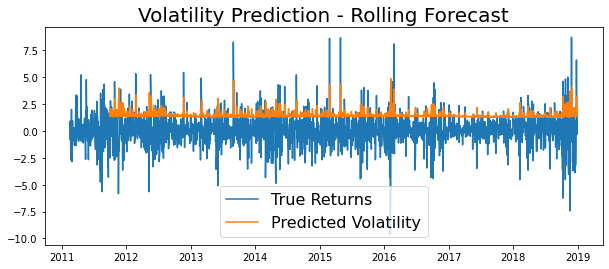

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-36*55:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [ ]:
train = returns
model = arch_model(train, p=1, q=0)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

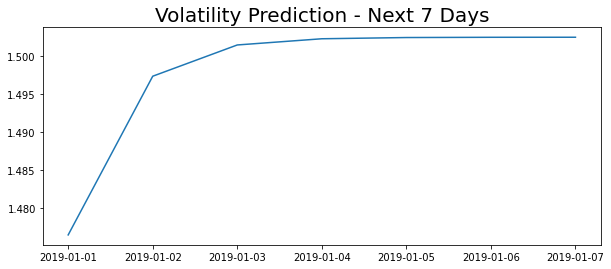

In [ ]:
#plotting volatility in returns for next 7 days
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

Applying models LSTM, Prophet and ARIMA

Model 1: LSTM

In [ ]:
2265-100

2165

In [ ]:
2265*0.8

1812.0

In [ ]:
len(df)

2265

In [ ]:
2265-355

1910

In [ ]:
#from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
train_set = df.iloc[0:1850, 4:5].values

In [ ]:
test_set = df.iloc[1850:, 4:5].values

In [ ]:
len(train_set)

1850

In [ ]:
len(test_set)

415

Creating and training LSTM model

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1850):
    X_train.append(training_set_scaled[i-60:i, 0]) #contains past 60 values
    y_train.append(training_set_scaled[i, 0]) #contains 61st value that model predicts
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #lstm expects input to be 3D right now train set is 2D so need to reshape

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) #1st layer has input shape (timesteps and no. of features)
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50)) #last lstm layer no need return_sequences
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist = regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
56/56 [==============================] - 6s 110ms/step - loss: 0.0296
Epoch 2/15
56/56 [==============================] - 6s 112ms/step - loss: 0.0053
Epoch 3/15
56/56 [==============================] - 6s 112ms/step - loss: 0.0048
Epoch 4/15
56/56 [==============================] - 6s 110ms/step - loss: 0.0047
Epoch 5/15
56/56 [==============================] - 6s 111ms/step - loss: 0.0044
Epoch 6/15
56/56 [==============================] - 6s 111ms/step - loss: 0.0042
Epoch 7/15
56/56 [==============================] - 6s 113ms/step - loss: 0.0044
Epoch 8/15
56/56 [==============================] - 6s 113ms/step - loss: 0.0039
Epoch 9/15
56/56 [==============================] - 6s 116ms/step - loss: 0.0045
Epoch 10/15
56/56 [==============================] - 6s 116ms/step - loss: 0.0037
Epoch 11/15
56/56 [==============================] - 7s 124ms/step - loss: 0.0036
Epoch 12/15
56/56 [==============================] - 7s 125ms/step - loss: 0.0034
Epoch 13/15
56/56 [======

In [ ]:
x = regressor.evaluate(X_train, y_train)

56/56 [==============================] - 1s 25ms/step - loss: 0.0014


In [ ]:
#rmse
import math
math.sqrt(x)

0.03789183016217222

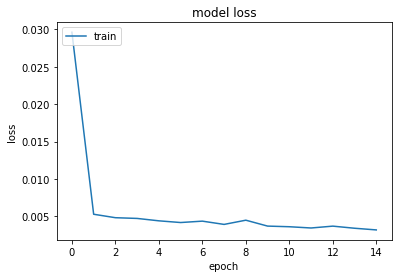

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#using model to predict stock prices for test set
sc = MinMaxScaler(feature_range = (0, 1))
testing_set_scaled = sc.fit_transform(test_set)
X_test = []
y_test = []
for i in range(60, 415):
    X_test.append(testing_set_scaled[i-60:i, 0])
    y_test.append(testing_set_scaled[i, 0]) 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[101.66247 ],
       [101.7866  ],
       [101.89417 ],
       [101.984604],
       [102.05754 ],
       [102.11277 ],
       [102.14046 ],
       [102.133194],
       [102.096085],
       [102.0416  ],
       [101.98954 ],
       [101.95265 ],
       [101.93671 ],
       [101.94671 ],
       [101.990105],
       [102.072235],
       [102.19878 ],
       [102.37131 ],
       [102.58449 ],
       [102.829254],
       [103.098976],
       [103.38973 ],
       [103.69948 ],
       [104.02575 ],
       [104.362366],
       [104.70508 ],
       [105.04818 ],
       [105.39069 ],
       [105.72824 ],
       [106.04925 ],
       [106.340065],
       [106.586555],
       [106.783745],
       [106.931114],
       [107.03115 ],
       [107.08723 ],
       [107.10457 ],
       [107.07905 ],
       [107.00563 ],
       [106.88672 ],
       [106.72719 ],
       [106.53808 ],
       [106.334694],
       [106.13824 ],
       [105.96858 ],
       [105.84084 ],
       [105.76606 ],
       [105.7

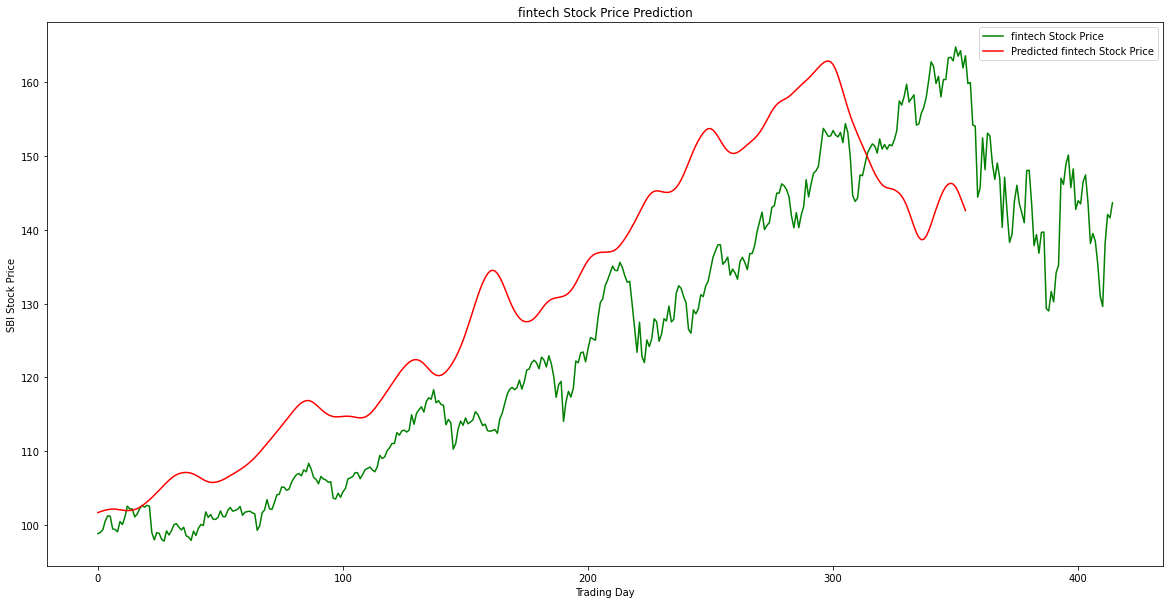

In [ ]:
#plot predicted stock price with actual stock price for test set
plt.figure(figsize=(20,10))
plt.plot(test_set, color = 'green', label = 'fintech Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted fintech Stock Price')
plt.title('fintech Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [ ]:
#using model to predict new stock prices
sc = MinMaxScaler(feature_range = (0, 1))
test2 = df.iloc[2205:2265, 4:5].values #last 60 values of test set
for i in range(60,415):
  testing2_set_scaled = sc.fit_transform(test2)
  X_test = []
  X_test.append(testing2_set_scaled[i-60:i, 0]) 
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  pred = regressor.predict(X_test)
  pred2 = sc.inverse_transform(pred)
  test2 = np.append(test2, pred2)
  test2 = np.reshape(test2, (len(test2), 1))

In [ ]:
test2

array([[159.8099945 ],
       [159.9630066 ],
       [154.1849945 ],
       [154.05      ],
       [144.4289978 ],
       [145.7160049 ],
       [152.4660049 ],
       [148.1549973 ],
       [153.0960022 ],
       [152.7089951 ],
       [148.9559967 ],
       [146.8410049 ],
       [149.0549973 ],
       [146.9940033 ],
       [140.3339951 ],
       [147.1200027 ],
       [142.3680038 ],
       [138.2910049 ],
       [139.3529984 ],
       [143.9160049 ],
       [146.0309967 ],
       [143.510994  ],
       [142.2960022 ],
       [140.9549973 ],
       [148.010994  ],
       [148.0829956 ],
       [143.6279984 ],
       [137.85      ],
       [139.3440033 ],
       [136.8150055 ],
       [139.6410049 ],
       [139.6950027 ],
       [129.3090019 ],
       [129.0029984 ],
       [131.6309967 ],
       [130.2269989 ],
       [134.1690033 ],
       [135.1860008 ],
       [146.9759995 ],
       [146.1480011 ],
       [148.8839951 ],
       [150.1349945 ],
       [145.7160049 ],
       [148

In [ ]:
len(test2)

415

In [ ]:
predictedValues = test2[60:len(test2)]

In [ ]:
#355 new stock prices 
predictedValues

array([[141.02279663],
       [140.45756531],
       [140.05300903],
       [139.80172729],
       [139.68063354],
       [139.66000366],
       [139.70866394],
       [139.79916382],
       [139.91003418],
       [140.02560425],
       [140.13627625],
       [140.23722839],
       [140.326828  ],
       [140.40565491],
       [140.47572327],
       [140.53944397],
       [140.59869385],
       [140.65570068],
       [140.71182251],
       [140.7678833 ],
       [140.82437134],
       [140.88160706],
       [140.93972778],
       [140.99861145],
       [141.05810547],
       [141.11785889],
       [141.17796326],
       [141.2383728 ],
       [141.29908752],
       [141.3598938 ],
       [141.42088318],
       [141.48194885],
       [141.54318237],
       [141.60490417],
       [141.66685486],
       [141.72895813],
       [141.79135132],
       [141.85394287],
       [141.91680908],
       [141.97973633],
       [142.04302979],
       [142.10661316],
       [142.17053223],
       [142

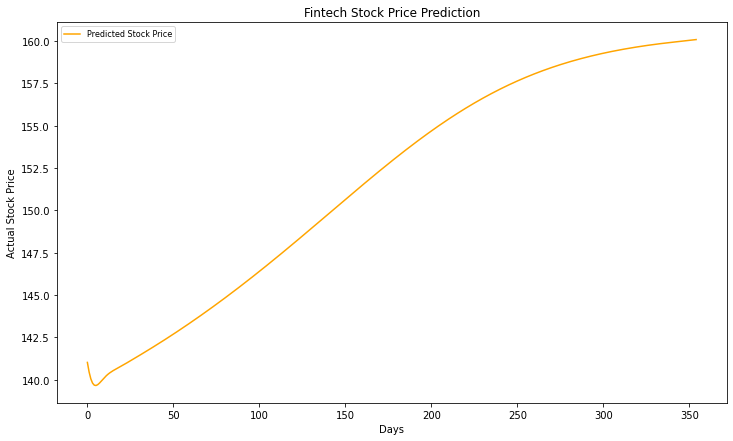

In [ ]:
#plotting 355 predicted stock prices 
plt.figure(figsize=(12,7))
plt.plot(predictedValues, color = 'orange',label='Predicted Stock Price')
plt.title('Fintech Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
len(predictedValues)

355

In [ ]:
df_lstm = dfans.copy(deep=True)

In [ ]:
df_lstm

,Date,Close
0,2/01/2019,100
1,3/01/2019,100
2,4/01/2019,100
3,7/01/2019,100
4,8/01/2019,100
...,...,...
350,22/05/2020,100
351,26/05/2020,100
352,27/05/2020,100
353,28/05/2020,100


In [ ]:
df_lstm["Close"] = predictedValues

In [ ]:
df_lstm

,Date,Close
0,2/01/2019,141.022797
1,3/01/2019,140.457565
2,4/01/2019,140.053009
3,7/01/2019,139.801727
4,8/01/2019,139.680634
...,...,...
350,22/05/2020,160.042328
351,26/05/2020,160.053818
352,27/05/2020,160.065323
353,28/05/2020,160.076813


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import os
os.chdir("/content/drive/")
!ls

'My Drive'


In [ ]:
submission_lstm = df_lstm.to_csv('/content/drive/My Drive/Fintech_Project_1/submission_lstm.csv', index=False)

Model 2: ARIMA

In [ ]:
df_arima = df2.copy(deep = True)

In [ ]:
df_arima.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2009-12-31,2009-12-31,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
2010-01-04,2010-01-04,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2010-01-05,2010-01-05,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
2010-01-06,2010-01-06,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
2010-01-07,2010-01-07,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [ ]:
df_arima.drop(["Date"],inplace=True, axis=1)

In [ ]:
df_arima.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
2010-01-04,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2010-01-05,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
2010-01-06,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
2010-01-07,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [ ]:
series = np.log(df_arima["Close"])

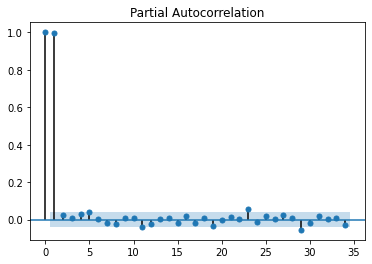

In [ ]:
plot_pacf(series)
plt.show()

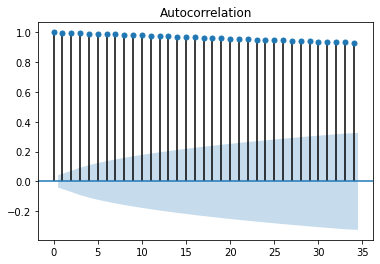

In [ ]:
plot_acf(series)
plt.show()

In [ ]:
train_data, test_data = df_arima[0:int(len(df_arima)*0.8)], df_arima[int(len(df_arima)*0.8):]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
#training and testing model (2,1,0) logged values of test set
train_data_check = np.log(train_data["Close"])
test_data_check = np.log(test_data["Close"])
history = [x for x in train_data_check]
print(type(history))
predictions = list()
for t in range(len(test_data_check)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_data_check[t]
    history.append(obs)
error = mean_squared_error(test_data_check, predictions)
print('Testing Mean Squared Error: %.3f' % error)
print(model_fit.summary())

<class 'list'>
Testing Mean Squared Error: 0.000
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2263
Model:                 ARIMA(2, 1, 0)   Log Likelihood                6338.351
Method:                       css-mle   S.D. of innovations              0.015
Date:                Tue, 06 Oct 2020   AIC                         -12668.703
Time:                        14:33:10   BIC                         -12645.805
Sample:                             1   HQIC                        -12660.347
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.033      0.042    2.14e-05       0.001
ar.L1.D.y     -0.0302      0.021     -1.437      0.151      -0.071       0.011
ar.

In [ ]:
#rmse
import math
math.sqrt(error)

0.014608281906621388

The above model seems good as the AIC and BIC are very low and all the p-values are smaller than 0.05. Also, the root mean squared error is relatively low.

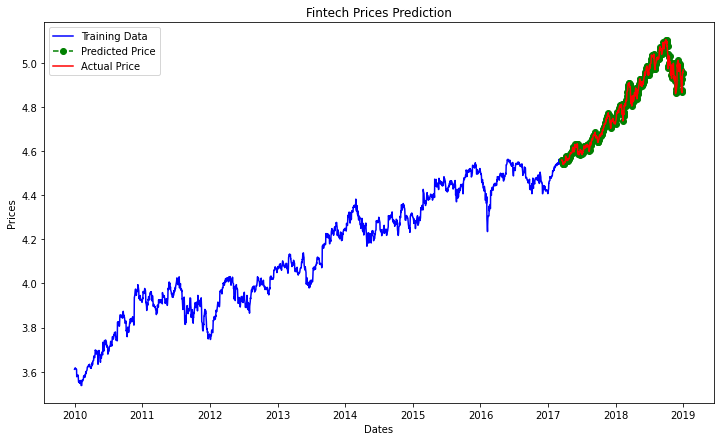

In [ ]:
#plotting logged predicted test set values with logged actual test set values
predictions = pd.Series(predictions, index=test_data_check.index)
plt.figure(figsize=(12,7))
plt.plot(train_data_check, 'green', color='blue', label='Training Data')
plt.plot(predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data_check.index, test_data_check, color='red', label='Actual Price')
plt.title('Fintech Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [ ]:
#training model (2,1,0) on entire logged train set and using it to  and predict 355 new stock prices
train_data3 = df_arima[0:int(len(df_arima))]
x = np.log(train_data3["Close"])
modeltry = ARIMA(x, order=(2, 1, 0))  
fittedtry = modeltry.fit(disp=-1)  
print(fittedtry.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2264
Model:                 ARIMA(2, 1, 0)   Log Likelihood                6341.163
Method:                       css-mle   S.D. of innovations              0.015
Date:                Tue, 06 Oct 2020   AIC                         -12674.325
Time:                        14:34:01   BIC                         -12651.426
Sample:                             1   HQIC                        -12665.970
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      2.053      0.040    2.72e-05       0.001
ar.L1.D.Close    -0.0303      0.021     -1.441      0.150      -0.071       0.011
ar.L2.D.Close    -0.0291      0.021     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
#training model (1,1,0) on entire logged train set and using it to  and predict 355 new stock prices
x = np.log(train_data3["Close"])
modeltry2 = ARIMA(x, order=(1, 1, 0))  
fittedtry2 = modeltry2.fit(disp=-1)  
print(fittedtry2.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2264
Model:                 ARIMA(1, 1, 0)   Log Likelihood                6340.202
Method:                       css-mle   S.D. of innovations              0.015
Date:                Tue, 06 Oct 2020   AIC                         -12674.403
Time:                        14:34:32   BIC                         -12657.229
Sample:                             1   HQIC                        -12668.136
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.000      1.995      0.046    1.05e-05       0.001
ar.L1.D.Close    -0.0294      0.021     -1.401      0.161      -0.071       0.012
                                    Root

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The above model results seem good as the AIC and BIC values are very low and all the p-values are smaller than 0.05.

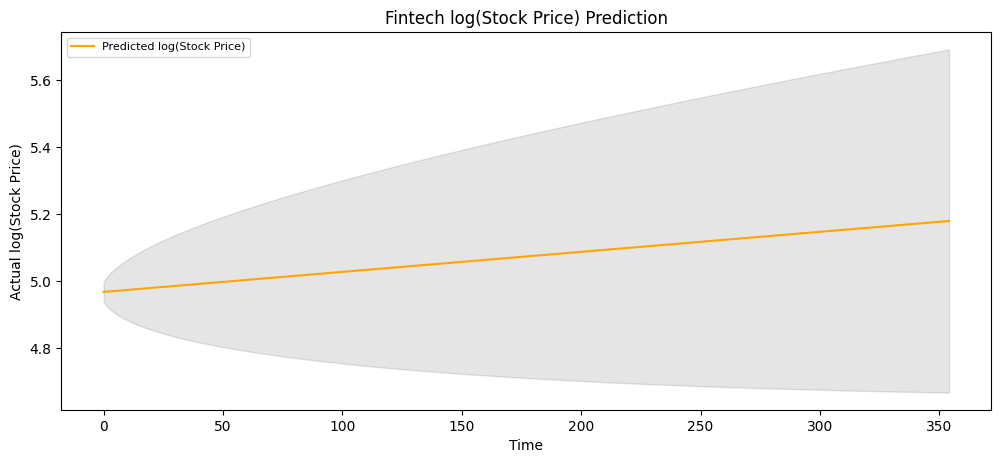

In [ ]:
#plotting log predicted stock prices for model (2,1,0)
fc, se, conf = fittedtry.forecast(355, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=dfans.index)
lower_series = pd.Series(conf[:, 0], index=dfans.index)
upper_series = pd.Series(conf[:, 1], index=dfans.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(fc_series, color = 'orange',label='Predicted log(Stock Price)')
plt.fill_between(dfans.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Fintech log(Stock Price) Prediction')
plt.xlabel('Time')
plt.ylabel('Actual log(Stock Price)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

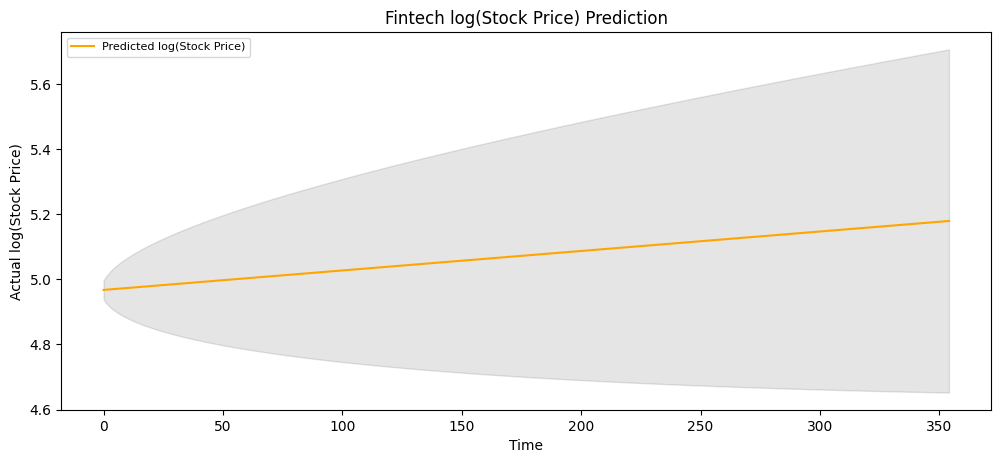

In [ ]:
#plotting log predicted stock prices for model (1,1,0)
fc2, se2, conf2 = fittedtry2.forecast(355, alpha=0.05)  # 95% confidence
fc_series2 = pd.Series(fc2, index=dfans.index)
lower_series2 = pd.Series(conf2[:, 0], index=dfans.index)
upper_series2 = pd.Series(conf2[:, 1], index=dfans.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(fc_series2, color = 'orange',label='Predicted log(Stock Price)')
plt.fill_between(dfans.index, lower_series2, upper_series2, 
                 color='k', alpha=.10)
plt.title('Fintech log(Stock Price) Prediction')
plt.xlabel('Time')
plt.ylabel('Actual log(Stock Price)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
import math

In [ ]:
#converting predicted log stock prices to actual stock prices for model (2,1,0)
fc2 = []
for i in fc:
    x = math.exp(i)
    fc2.append(x)

In [ ]:
fc2

[143.7151089603176,
 143.7445263557039,
 143.83362715907683,
 143.92134535078094,
 144.00741992134743,
 144.09363931185635,
 144.17995698578395,
 144.26632223175667,
 144.35273797591069,
 144.43920564125295,
 144.52572513219258,
 144.61229644299618,
 144.69891960951276,
 144.78559466373062,
 144.87232163656248,
 144.95910055908587,
 145.04593146242414,
 145.13281437771465,
 145.21974933611241,
 145.30673636879143,
 145.3937755069443,
 145.48086678178237,
 145.56801022453564,
 145.65520586645286,
 145.74245373880146,
 145.8297538728676,
 145.91710629995623,
 146.00451105139098,
 146.09196815851428,
 146.17947765268735,
 146.2670395652902,
 146.35465392772156,
 146.44232077139907,
 146.53004012775912,
 146.61781202825694,
 146.70563650436665,
 146.79351358758115,
 146.88144330941228,
 146.96942570139066,
 147.05746079506594,
 147.1455486220065,
 147.23368921379975,
 147.32188260205197,
 147.4101288183884,
 147.49842789445322,
 147.5867798619095,
 147.67518475243938,
 147.76364259774394,


In [ ]:
#converting predicted log stock prices to actual stock prices for model (1,1,0)
fc3 = []
for i in fc2:
    x = math.exp(i)
    fc3.append(x)

In [ ]:
fc3

[143.70048870875627,
 143.78831409554317,
 143.874415802664,
 143.96062141634366,
 144.04687714026053,
 144.1331845907344,
 144.2195437520367,
 144.30595465652664,
 144.3924173351663,
 144.4789318189779,
 144.5654981390012,
 144.65211632629445,
 144.7387864119346,
 144.82550842701718,
 144.9122824026563,
 144.9991083699848,
 145.08598636015418,
 145.17291640433447,
 145.25989853371453,
 145.34693277950186,
 145.43401917292258,
 145.52115774522161,
 145.6083485276626,
 145.69559155152783,
 145.78288684811844,
 145.87023444875425,
 145.95763438477388,
 146.0450866875347,
 146.13259138841292,
 146.22014851880346,
 146.30775811012015,
 146.39542019379556,
 146.48313480128118,
 146.57090196404724,
 146.65872171358288,
 146.74659408139615,
 146.8345190990139,
 146.92249679798192,
 147.01052720986488,
 147.09861036624636,
 147.1867462987289,
 147.2749350389339,
 147.3631766185018,
 147.45147106909195,
 147.5398184223826,
 147.62821871007117,
 147.71667196387384,
 147.80517821552596,
 147.8937

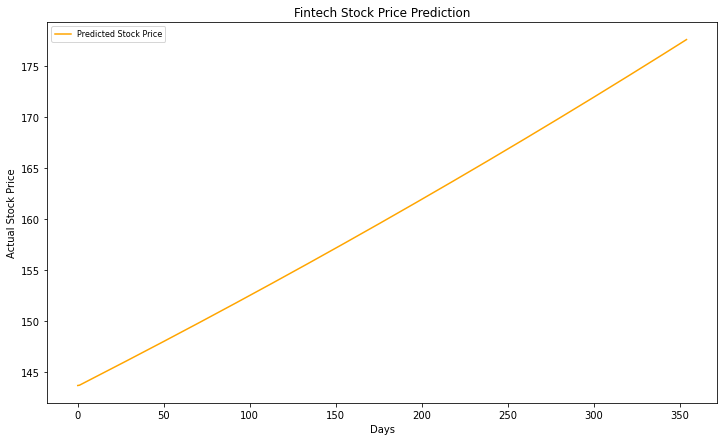

In [ ]:
#plotting actual predicted stock prices for model (2,1,0)
plt.figure(figsize=(12,7))
plt.plot(fc2, color = 'orange',label='Predicted Stock Price')
plt.title('Fintech Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

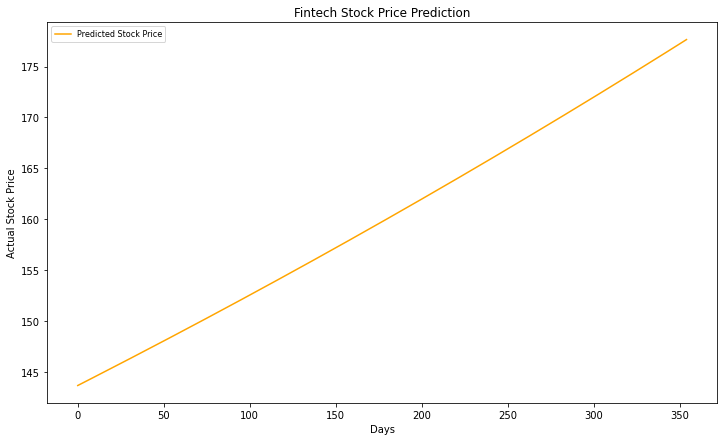

In [ ]:
#plotting actual predicted stock prices for model (1,1,0)
plt.figure(figsize=(12,7))
plt.plot(fc3, color = 'orange',label='Predicted Stock Price')
plt.title('Fintech Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fc2_series = pd.Series(fc2, index=dfans.index)

In [ ]:
fc2_series

0      143.715109
1      143.744526
2      143.833627
3      143.921345
4      144.007420
          ...    
350    177.160746
351    177.266866
352    177.373049
353    177.479296
354    177.585607
Length: 355, dtype: float64

In [ ]:
len(fc2_series)

355

In [ ]:
dfans.head()

,Date,Close
0,2/01/2019,100
1,3/01/2019,100
2,4/01/2019,100
3,7/01/2019,100
4,8/01/2019,100


In [ ]:
dfans_arima = dfans.copy(deep=True)

In [ ]:
dfans_arima.head()

,Date,Close
0,2/01/2019,100
1,3/01/2019,100
2,4/01/2019,100
3,7/01/2019,100
4,8/01/2019,100


In [ ]:
dfans_arima["Close"] = fc2_series

In [ ]:
dfans_arima.head()

,Date,Close
0,2/01/2019,143.715109
1,3/01/2019,143.744526
2,4/01/2019,143.833627
3,7/01/2019,143.921345
4,8/01/2019,144.007420


In [ ]:
fc3_series = pd.Series(fc3, index=dfans.index)
fc3_series

0      143.700489
1      143.788314
2      143.874416
3      143.960621
4      144.046877
          ...    
350    177.219103
351    177.325286
352    177.431532
353    177.537843
354    177.644216
Length: 355, dtype: float64

In [ ]:
dfans_arima2 = dfans.copy(deep=True)

In [ ]:
dfans_arima2["Close"] = fc3_series

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import os
os.chdir("/content/drive/")
!ls

'My Drive'


In [ ]:
submission_arima = dfans_arima.to_csv('/content/drive/My Drive/Fintech_Project_1/submission_arima.csv', index=False) 

In [ ]:
submission_arima2 = dfans_arima2.to_csv('/content/drive/My Drive/Fintech_Project_1/submission_arima2.csv', index=False) 

Model 3: Prophet

In [ ]:
df_prophet = df2.copy(deep = True)

In [ ]:
df_prophet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2009-12-31,2009-12-31,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
2010-01-04,2010-01-04,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2010-01-05,2010-01-05,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
2010-01-06,2010-01-06,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
2010-01-07,2010-01-07,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [ ]:
df_prophet = df_prophet.drop(['Open', 'High', 'Low','Volume', 'Adj Close'], axis=1)

In [ ]:
df_prophet.head()

,Date,Close
Date,,
2009-12-31,2009-12-31,36.998249
2010-01-04,2010-01-04,37.234500
2010-01-05,2010-01-05,37.162500
2010-01-06,2010-01-06,37.133251
2010-01-07,2010-01-07,37.059000


In [ ]:
df_prophet.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [ ]:
df_prophet.head()

,ds,y
Date,,
2009-12-31,2009-12-31,36.998249
2010-01-04,2010-01-04,37.234500
2010-01-05,2010-01-05,37.162500
2010-01-06,2010-01-06,37.133251
2010-01-07,2010-01-07,37.059000


In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_prices = m.make_future_dataframe(periods=515)
forecast = m.predict(future_prices)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2775,2020-05-25,210.013608,195.794567,225.600196
2776,2020-05-26,210.192775,195.568083,225.683328
2777,2020-05-27,210.369550,196.124992,225.782900
2778,2020-05-28,210.621678,195.910446,225.526638
2779,2020-05-29,210.666358,196.079797,225.371721


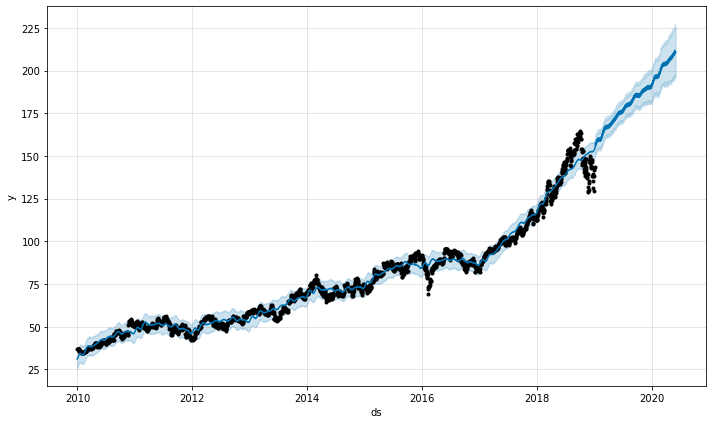

In [ ]:
fig = m.plot(forecast)

In [ ]:
predictions = forecast[['ds', 'yhat']]

In [ ]:
predictions

,ds,yhat
0,2009-12-31,31.100277
1,2010-01-04,31.759759
2,2010-01-05,32.041258
3,2010-01-06,32.325947
4,2010-01-07,32.689163
...,...,...
2775,2020-05-25,210.013608
2776,2020-05-26,210.192775
2777,2020-05-27,210.369550
2778,2020-05-28,210.621678


In [ ]:
ans = (predictions['ds'] > '2019-01-1') & (predictions['ds'] <= '2020-05-29')

In [ ]:
ans

0       False
1       False
2       False
3       False
4       False
        ...  
2775     True
2776     True
2777     True
2778     True
2779     True
Name: ds, Length: 2780, dtype: bool

In [ ]:
dfansprophet = predictions.loc[ans]

In [ ]:
dfansprophet

,ds,yhat
2266,2019-01-02,154.740168
2267,2019-01-03,155.150989
2268,2019-01-04,155.367708
2269,2019-01-05,157.454294
2270,2019-01-06,157.744831
...,...,...
2775,2020-05-25,210.013608
2776,2020-05-26,210.192775
2777,2020-05-27,210.369550
2778,2020-05-28,210.621678


In [ ]:
dfprof = dfansprophet.copy(deep=True)

In [ ]:
dfprof.reset_index(inplace=True)

In [ ]:
dfprof.drop(["index"], axis=1, inplace=True)

In [ ]:
dfprof.rename(columns={'ds':'Date'}, inplace=True)

In [ ]:
dfprof

,Date,yhat
0,2019-01-02,154.740168
1,2019-01-03,155.150989
2,2019-01-04,155.367708
3,2019-01-05,157.454294
4,2019-01-06,157.744831
...,...,...
509,2020-05-25,210.013608
510,2020-05-26,210.192775
511,2020-05-27,210.369550
512,2020-05-28,210.621678


In [ ]:
dfans_prophet = dfans.copy(deep=True)

In [ ]:
dfans_prophet

,Date,Close
0,2/01/2019,100
1,3/01/2019,100
2,4/01/2019,100
3,7/01/2019,100
4,8/01/2019,100
...,...,...
350,22/05/2020,100
351,26/05/2020,100
352,27/05/2020,100
353,28/05/2020,100


In [ ]:
dfans_prophet["Date"] = pd.to_datetime(dfans_prophet["Date"], dayfirst=True)

In [ ]:
dfans_prophet.head(20) #YYYY-MM-DD

,Date,Close
0,2019-01-02,100
1,2019-01-03,100
2,2019-01-04,100
3,2019-01-07,100
4,2019-01-08,100
5,2019-01-09,100
6,2019-01-10,100
7,2019-01-11,100
8,2019-01-14,100
9,2019-01-15,100


In [ ]:
dfans_prophet_final = pd.merge(dfans_prophet, dfprof, on=['Date'], how='inner')

In [ ]:
#predicted stock prices on trading days only
dfans_prophet_final

,Date,Close,yhat
0,2019-01-02,100,154.740168
1,2019-01-03,100,155.150989
2,2019-01-04,100,155.367708
3,2019-01-07,100,156.079865
4,2019-01-08,100,156.408467
...,...,...,...
350,2020-05-22,100,209.742798
351,2020-05-26,100,210.192775
352,2020-05-27,100,210.369550
353,2020-05-28,100,210.621678


In [ ]:
dfans_prophet_final.drop(["Close"], axis=1, inplace=True)

In [ ]:
dfans_prophet_final.rename(columns={'yhat':'Close'}, inplace=True)

In [ ]:
dfans_prophet_final['Date'] = (dfans_prophet_final['Date']).dt.strftime("%e/%m/%Y")

In [ ]:
dfans_prophet_final.head()

,Date,Close
0,2/01/2019,154.740168
1,3/01/2019,155.150989
2,4/01/2019,155.367708
3,7/01/2019,156.079865
4,8/01/2019,156.408467


In [ ]:
df_prophet = dfans.copy(deep=True)

In [ ]:
df_prophet["Close"] = dfans_prophet_final["Close"]

In [ ]:
df_prophet

,Date,Close
0,2/01/2019,154.740168
1,3/01/2019,155.150989
2,4/01/2019,155.367708
3,7/01/2019,156.079865
4,8/01/2019,156.408467
...,...,...
350,22/05/2020,209.742798
351,26/05/2020,210.192775
352,27/05/2020,210.369550
353,28/05/2020,210.621678


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/")
!ls

'My Drive'


In [ ]:
submission_prophet3 = df_prophet.to_csv('/content/drive/My Drive/Fintech_Project_1/submission_prophet3.csv', index=False)